**Importing essential libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset:**

In [2]:
path = 'Dataset/LoanApproval.csv'

data = pd.read_csv(path)

**Basic Data exploration:**

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Finding summary of the dataset:**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Dropping irrelevant feature(s) without losing information:**

In [5]:
data.drop('Loan_ID', axis = 1, inplace = True)# Dropping Loan ID feature

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Describing numerical variables:**

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Describing categorical variables:**

In [7]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


**Insights:**

- There appears to be missing values.

- Loan_Status is the target feature.

- Majority of the applicants are male, married, graduate and have no dependents.

**Checking for missing values:**

In [8]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Insights:**

Columns with missing values are

- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

**Handling missing values:**

Finding missing values in percentage:

In [9]:
def missing_to_df(df):
    total_missing_df = df.isnull().sum().sort_values(ascending = False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)*100
    missing_data_df = pd.concat(
        [total_missing_df, percent_missing_df], axis = 1,
        keys = ['Total', 'Percent']
    )
    return missing_data_df

In [10]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


Insights:

- Missing values are less than 10 percent
- Data is not corrupted. So missing values can be removed or imputed

For credit history, it is not possible to impute with already existing values(0 and 1).
Neither it is possible to impute with mean value, so creating a new category. 

In [11]:
data['Credit_History'] = data['Credit_History'].fillna('2')

In [12]:
data['Self_Employed'].unique() # Looking at existing values in the Self_Employed feature

array(['No', 'Yes', nan], dtype=object)

Creating new value 'Other' for the feature Self_Employed.

In [13]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')

Since Loan Amount is a continuous feature, it is possible to impute with median(mean is prone to outlier). Same can be done for Loan Amount Term.

In [14]:
from sklearn.impute import SimpleImputer # Importing SimpleImputer for imputation

In [15]:
num_missing = ['LoanAmount', 'Loan_Amount_Term']

median_imputer = SimpleImputer(strategy = 'median') # Function to impute values

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

For the features Married, Gender and Dependents, the missing values are low so mode can be applied to the missing values.

In [16]:
cat_missing = ['Gender', 'Married', 'Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')

for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

Checking again for missing values.

In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**There are no more null values.**

**Removing or replacing redundant or erroneous values:**

In this case, there are no such values.

**Looking at the data again:**

In [18]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


There seems to be outliers in Applicant income.

In [19]:
lower_limit = data['ApplicantIncome'].quantile(0.01)

lower_limit # Checking for 1 percentile value

1025.0

In [20]:
upper_limit = data['ApplicantIncome'].quantile(0.99)

upper_limit # Checking 99 percentile value

32540.410000000047

- Minimum value in Applicant Income is way below 1 percentile, so it is safe to remove it.

- As for the maximum value, large income can be possible in the given context.

In [21]:
data = data[~(data['ApplicantIncome'] < lower_limit)]

In [22]:
data.describe() # Checking again

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,608.000000,608.000000,608.000000,608.000000
mean,5451.692434,1541.216974,145.588816,342.335526
std,6119.638887,2442.111217,84.062846,64.151329
min,1025.000000,0.000000,9.000000,12.000000
25%,2898.750000,0.000000,100.000000,360.000000
50%,3824.500000,1125.500000,128.000000,360.000000
75%,5815.750000,2253.250000,164.250000,360.000000
max,81000.000000,33837.000000,700.000000,480.000000


**EDA:**

- The function in below cell does univariate analysis using bar plot and pie plot.

In [23]:
def univariate_plot_matplotlib(df, column):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values
    percentages = values / values.sum() * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bar Plot
    axes[0].bar(labels, values, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Bar Plot of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    for i, v in enumerate(values):
        axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

    # Pie Chart
    axes[1].pie(values,
                labels=labels,
                autopct='%1.1f%%',
                startangle=90,
                explode=[0.05]*len(values),
                colors=plt.cm.Set2.colors[:len(values)],
                shadow=True)
    axes[1].set_title(f'Pie Chart of {column}')
    axes[1].axis('equal')

    plt.tight_layout()
    plt.show()

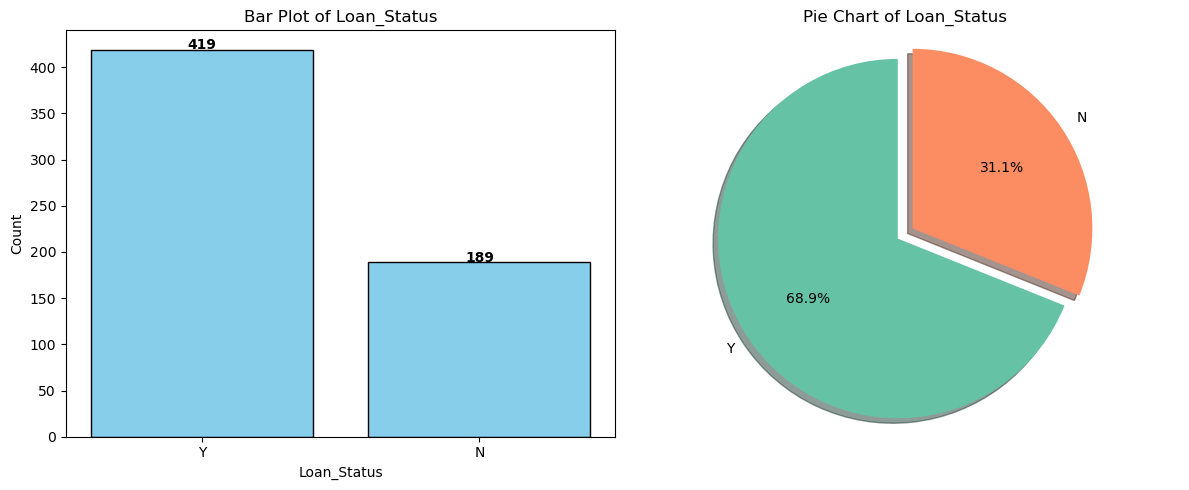

In [24]:
univariate_plot_matplotlib(data, 'Loan_Status')

- About 69% of the loans are approved.

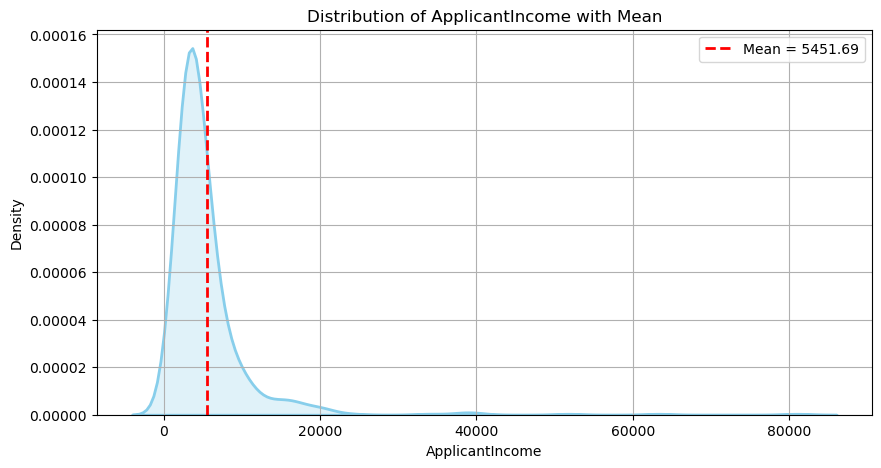

In [25]:
column = 'ApplicantIncome'

# Calculate mean
mean_val = data[column].mean()

# KDE Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data[column], fill=True, color='skyblue', linewidth=2)

# Vertical line at mean
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')

# Labels and legend
plt.title(f'Distribution of {column} with Mean')
plt.xlabel(column)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

- There is disparity in income of the applicants. This could be due to education.

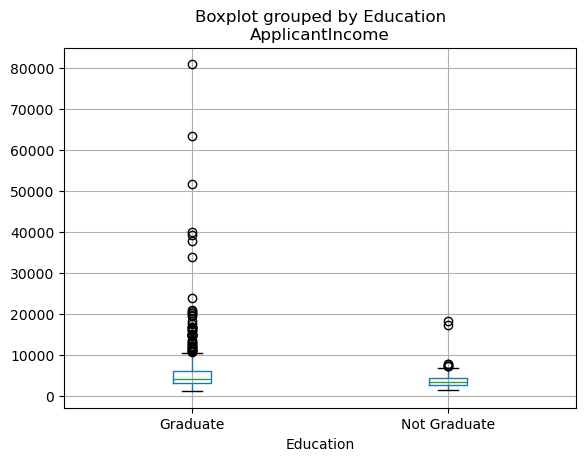

In [26]:
data.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.show()

- Graduates have outlying incomes as compared to Non graduates.

Checking the same for Coapplicant income:

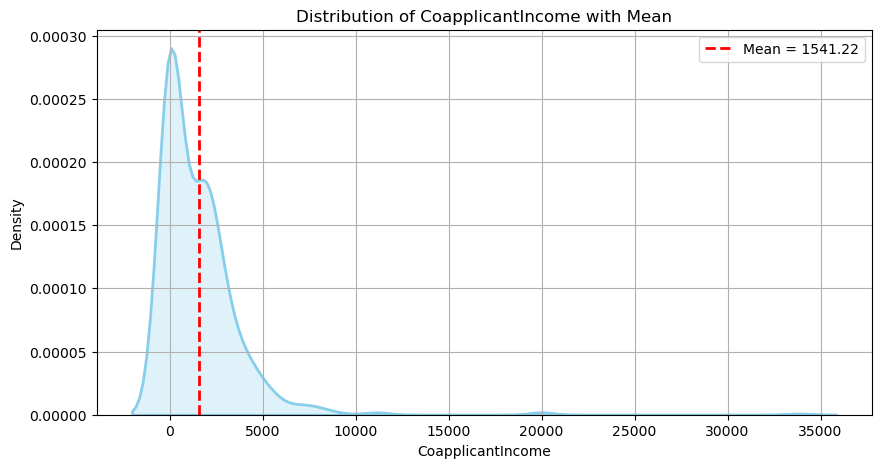

In [27]:
column = 'CoapplicantIncome'

# Calculate mean
mean_val = data[column].mean()

# KDE Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data[column], fill=True, color='skyblue', linewidth=2)

# Vertical line at mean
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')

# Labels and legend
plt.title(f'Distribution of {column} with Mean')
plt.xlabel(column)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

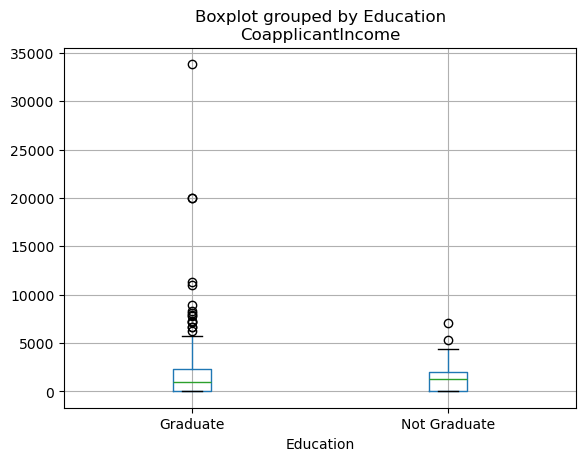

In [28]:
data.boxplot(column = 'CoapplicantIncome', by = 'Education')
plt.show()

- Similar trends are observed in Coapplicant income.

Comparing applicant income with the loan status:

In [29]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5524.238095
Y    5418.968974
Name: ApplicantIncome, dtype: float64

- Mean income is almost same for both the cases of loan approval which seems counterintuitive.

Since income varies largely, segmenting the applicants based on income.

In [30]:
bins = [0, 2500, 4000, 6000, 81000]
group_name = ['Low', 'Average', 'High', 'Very High']

data['Income_bin'] = pd.cut(data['ApplicantIncome'], bins = bins, labels = group_name)
data['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very High
612    Very High
613         High
Name: Income_bin, Length: 608, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

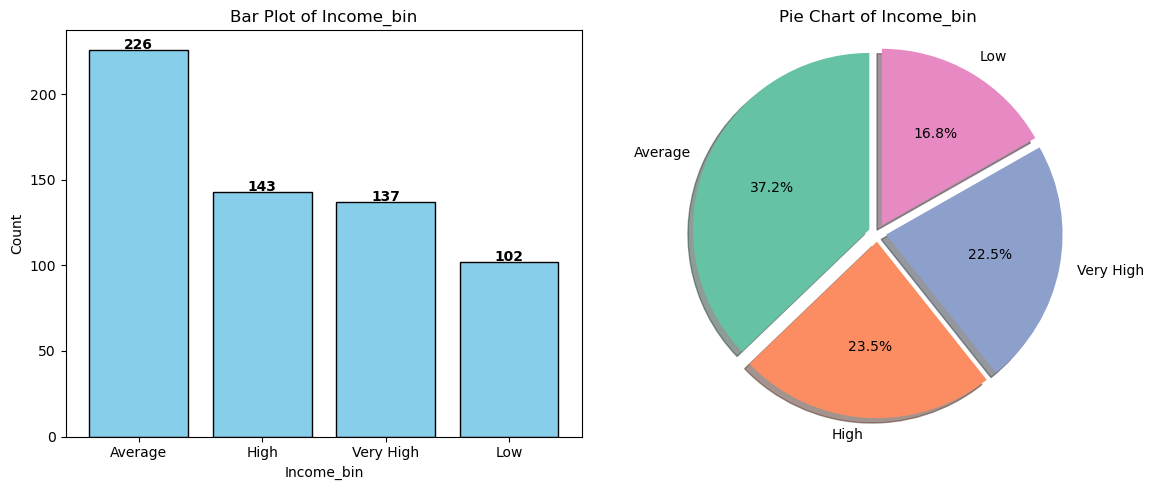

In [31]:
univariate_plot_matplotlib(data, 'Income_bin')

Writing a function to compare Approval rate with another feature:

In [32]:
def approval_rate(data, column):
    cross = pd.crosstab(data[column], data['Loan_Status'])
    percentage = cross.div(cross.sum(axis = 1), axis = 0)*100
    percentage.plot(kind = 'bar', stacked = True)
    plt.xlabel(column)
    plt.xticks(rotation = 0)
    plt.ylabel('Approval Rate (%)')
    plt.title(f'Loan Approval Rate by {column}')
    plt.grid(axis='y')
    plt.show()
    

**Approval Rate vs. Income Bin**

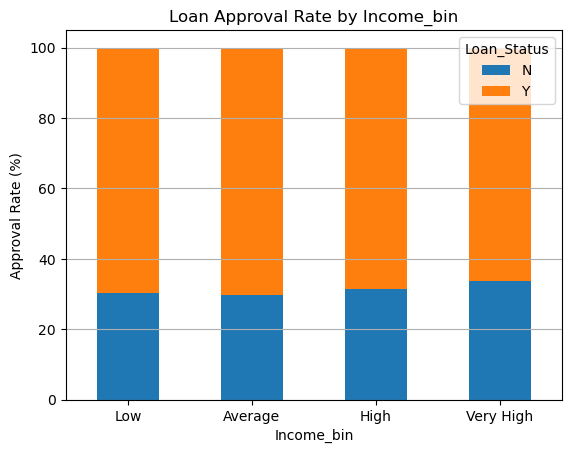

In [33]:
approval_rate(data, 'Income_bin')

- Loan approval rate is independent of income group.

Trying the same with total household income:

In [34]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [35]:
data['TotalIncome_bin'] = pd.cut(data['TotalIncome'], bins = bins, labels = group_name)
data['TotalIncome_bin']

0           High
1      Very High
2        Average
3           High
4           High
         ...    
609      Average
610         High
611    Very High
612    Very High
613         High
Name: TotalIncome_bin, Length: 608, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

**Approval Rate vs. Total Income**

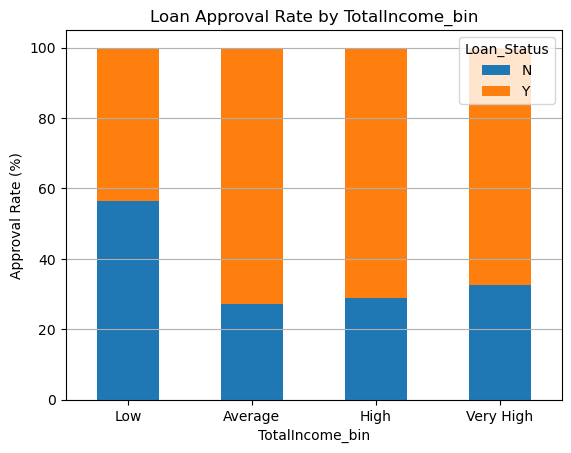

In [36]:
approval_rate(data, 'TotalIncome_bin')

- Loan application gets disapproved more often for low income group compared to other groups.

Dropping the income bin columns to avoid any kind of correlated variables in the future.

In [37]:
data = data.drop(['Income_bin', 'TotalIncome_bin'], axis = 1)

Analysing Loan Amount Term:

In [38]:
data['Loan_Amount_Term'].nunique()

10

- There are 10 unique values.

In [39]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    522
180.0     43
480.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

- Values are multiple of 12. So it is safe to assume that term is in months.

In [40]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float') # Converting it in years

In [41]:
pd.crosstab(data['Loan_Amount_Term'], data['Loan_Status'])

Loan_Status,N,Y
Loan_Amount_Term,,
1.0,0,1
3.0,2,0
5.0,0,2
7.0,1,3
10.0,0,3
15.0,14,29
20.0,1,3
25.0,5,8
30.0,157,365


- Most of the loan term are from 15 to 30 years.

Creating new feature Loan_Amount_per_year and EMI to compare it to total income of the applicant:

In [42]:
data['Loan_Amount_per_year'] = data['LoanAmount']/data['Loan_Amount_Term']

In [43]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12 # Loan amount given is in thousands

In [44]:
data['EMI']

0      355.555556
1      355.555556
2      183.333333
3      333.333333
4      391.666667
          ...    
609    197.222222
610    222.222222
611    702.777778
612    519.444444
613    369.444444
Name: EMI, Length: 608, dtype: float64

Creating a new feature Debt-to-Income ratio for our analysis

In [45]:
data['DTI'] = (data['EMI']/data['TotalIncome'])*100

Segmenting the Debt-to-Income ratio

In [46]:
bins = [0, 30, 40, 50, 1000]  # 1000 as upper bound to catch outliers
labels = ['Low (<30%)', 'Moderate (30-40%)', 'High (40-50%)', 'Very High (>50%)']
data['DTI_Category'] = pd.cut(data['DTI'], bins=bins, labels=labels, right=False)

Analysing dependents feature:

In [47]:
data['Dependents'].value_counts()

Dependents
0     357
1     101
2     100
3+     50
Name: count, dtype: int64

In [48]:
data['Dependents'].replace('3+', 3, inplace = True)

In [49]:
data['Dependents'] = data['Dependents'].astype('float') # Converting its data type to float

Comparing some more featutre with loan status:

**Approval Rate vs. Dependents**

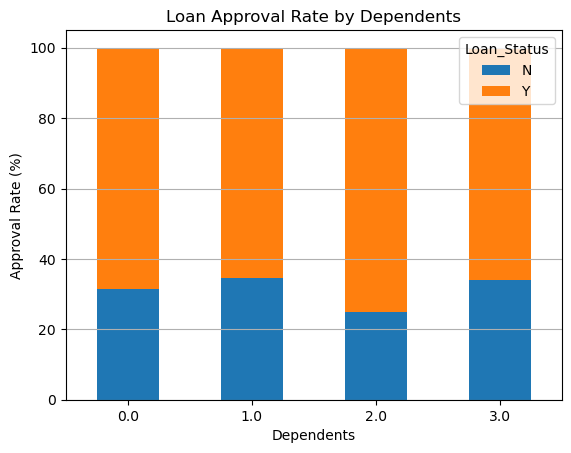

In [50]:
approval_rate(data, 'Dependents')

**Approval Rate vs. Self Employed**

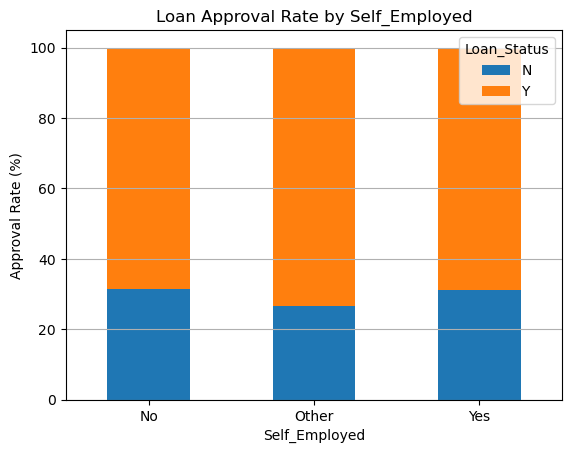

In [51]:
approval_rate(data, 'Self_Employed')

**Approval Rate vs. Credit History**

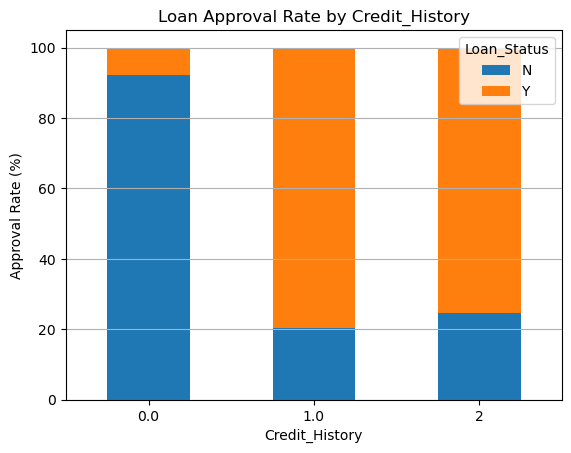

In [52]:
approval_rate(data, 'Credit_History')

**Approval Rate vs. Gender**

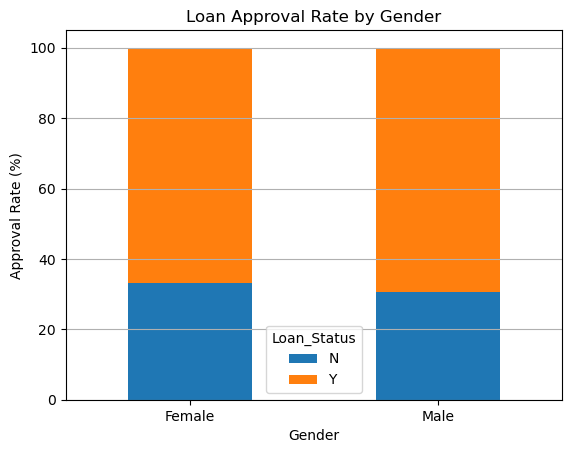

In [53]:
approval_rate(data, 'Gender')

**Approval Rate vs. Married**

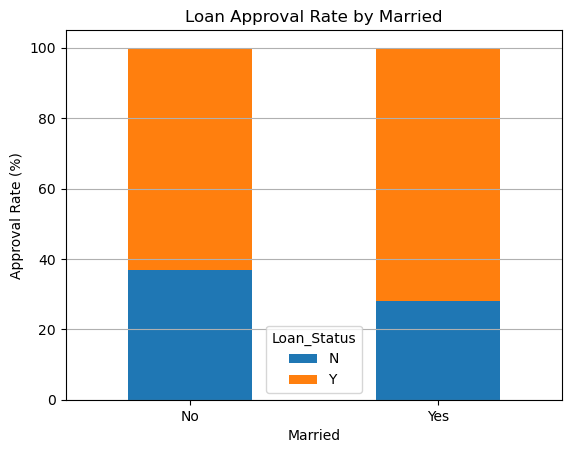

In [54]:
approval_rate(data, 'Married')

**Approval Rate vs. Education**

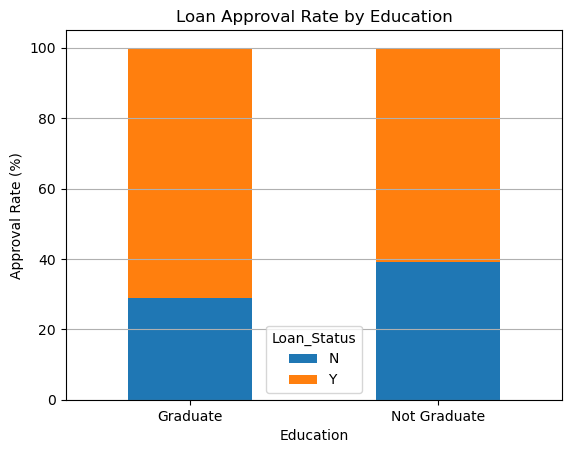

In [55]:
approval_rate(data, 'Education')

**Approval Rate vs. Property Area**

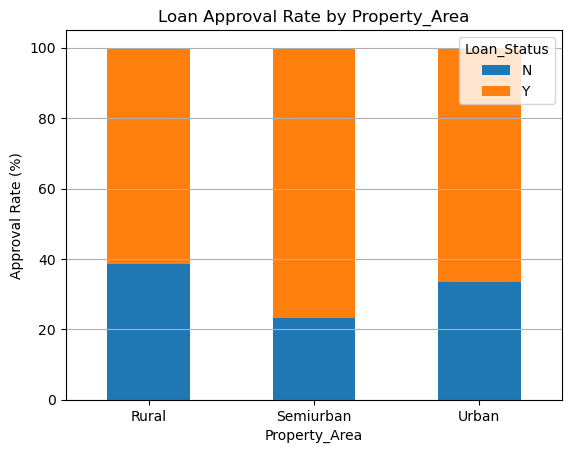

In [56]:
approval_rate(data, 'Property_Area')

**Approval Rate vs. DTI category**

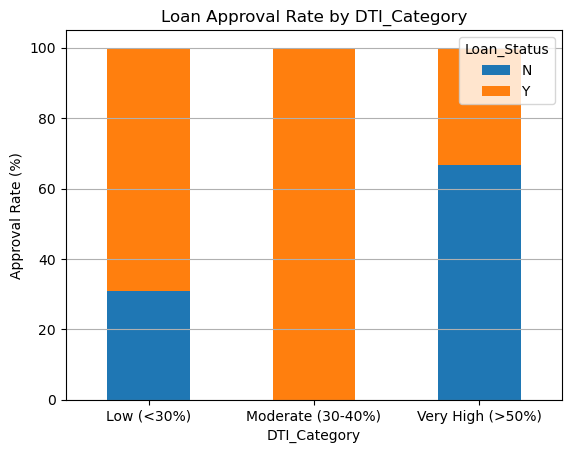

In [58]:
approval_rate(data, 'DTI_Category')

**Distribution of DTI ratios**

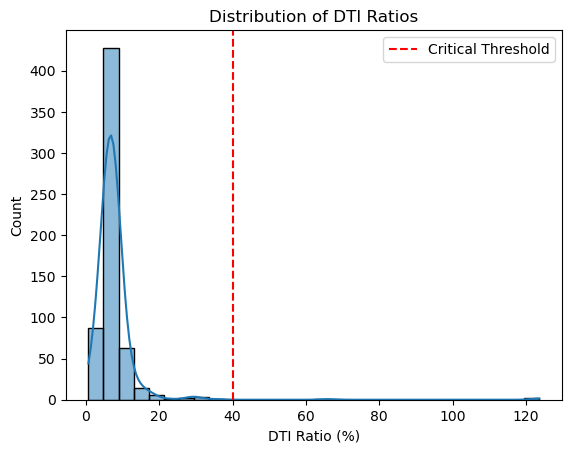

In [57]:
sns.histplot(data['DTI'], bins=30, kde=True)
plt.axvline(40, color='red', linestyle='--', label='Critical Threshold')
plt.title('Distribution of DTI Ratios')
plt.xlabel('DTI Ratio (%)')
plt.legend()
plt.show()

**Multivariate Analysis:**

**DTI × Employment × Loan_Status**

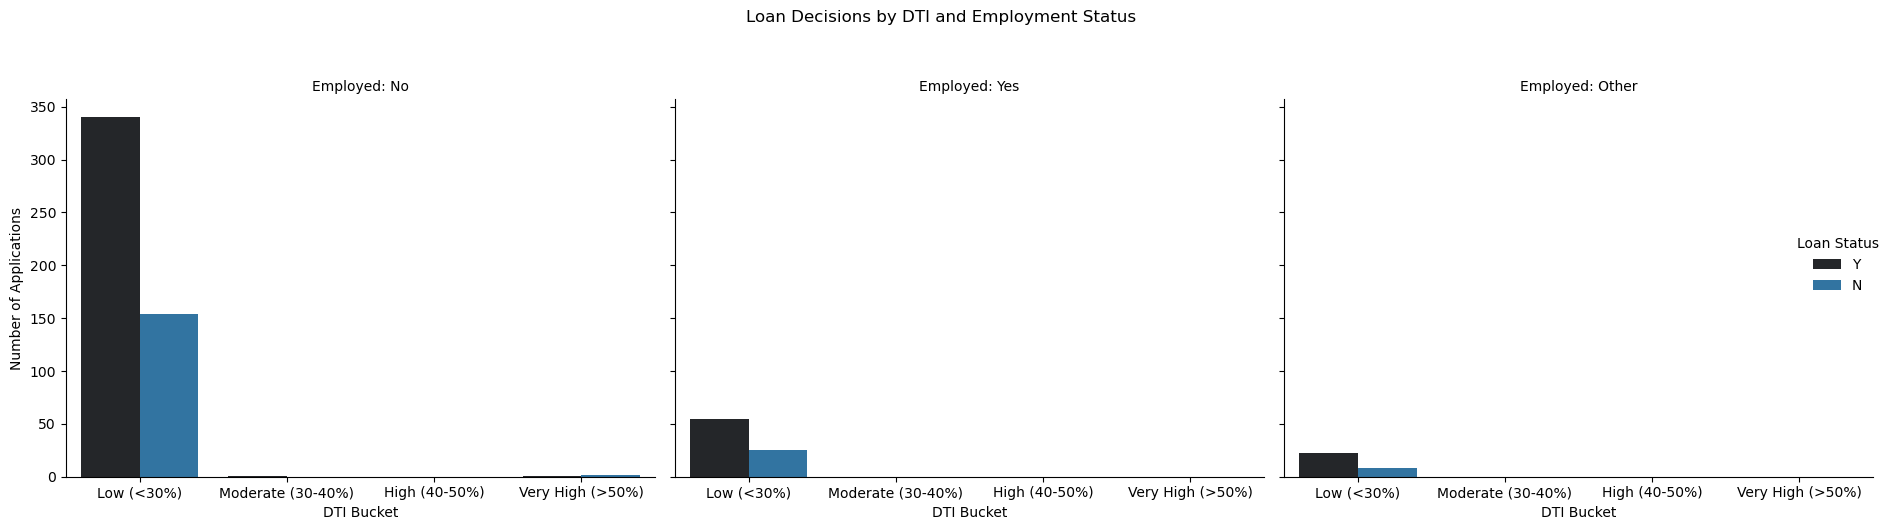

In [59]:
g = sns.FacetGrid(data, col='Self_Employed', height=5, aspect=1.2)
g.map_dataframe(sns.countplot, x='DTI_Category', hue='Loan_Status', 
                order=['Low (<30%)','Moderate (30-40%)','High (40-50%)','Very High (>50%)'],
                hue_order=['Y','N'])
g.add_legend(title='Loan Status')
g.set_axis_labels('DTI Bucket', 'Number of Applications')
g.set_titles(col_template="Employed: {col_name}")
g.fig.suptitle('Loan Decisions by DTI and Employment Status', y=1.05)
plt.tight_layout()
plt.show()

**DTI × Education × Loan_Status**

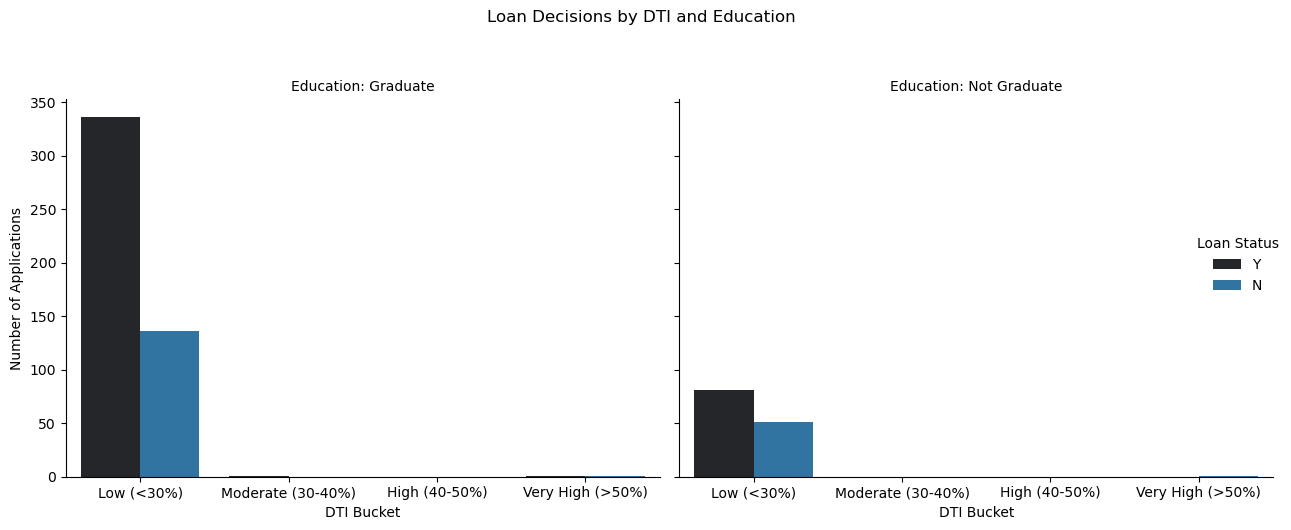

In [60]:
g = sns.FacetGrid(data, col='Education', height=5, aspect=1.2)
g.map_dataframe(sns.countplot, x='DTI_Category', hue='Loan_Status', 
                order=['Low (<30%)','Moderate (30-40%)','High (40-50%)','Very High (>50%)'],
                hue_order=['Y','N'])
g.add_legend(title='Loan Status')
g.set_axis_labels('DTI Bucket', 'Number of Applications')
g.set_titles(col_template="Education: {col_name}")
g.fig.suptitle('Loan Decisions by DTI and Education', y=1.05)
plt.tight_layout()
plt.show()

**Employment × Education × Loan_Status**

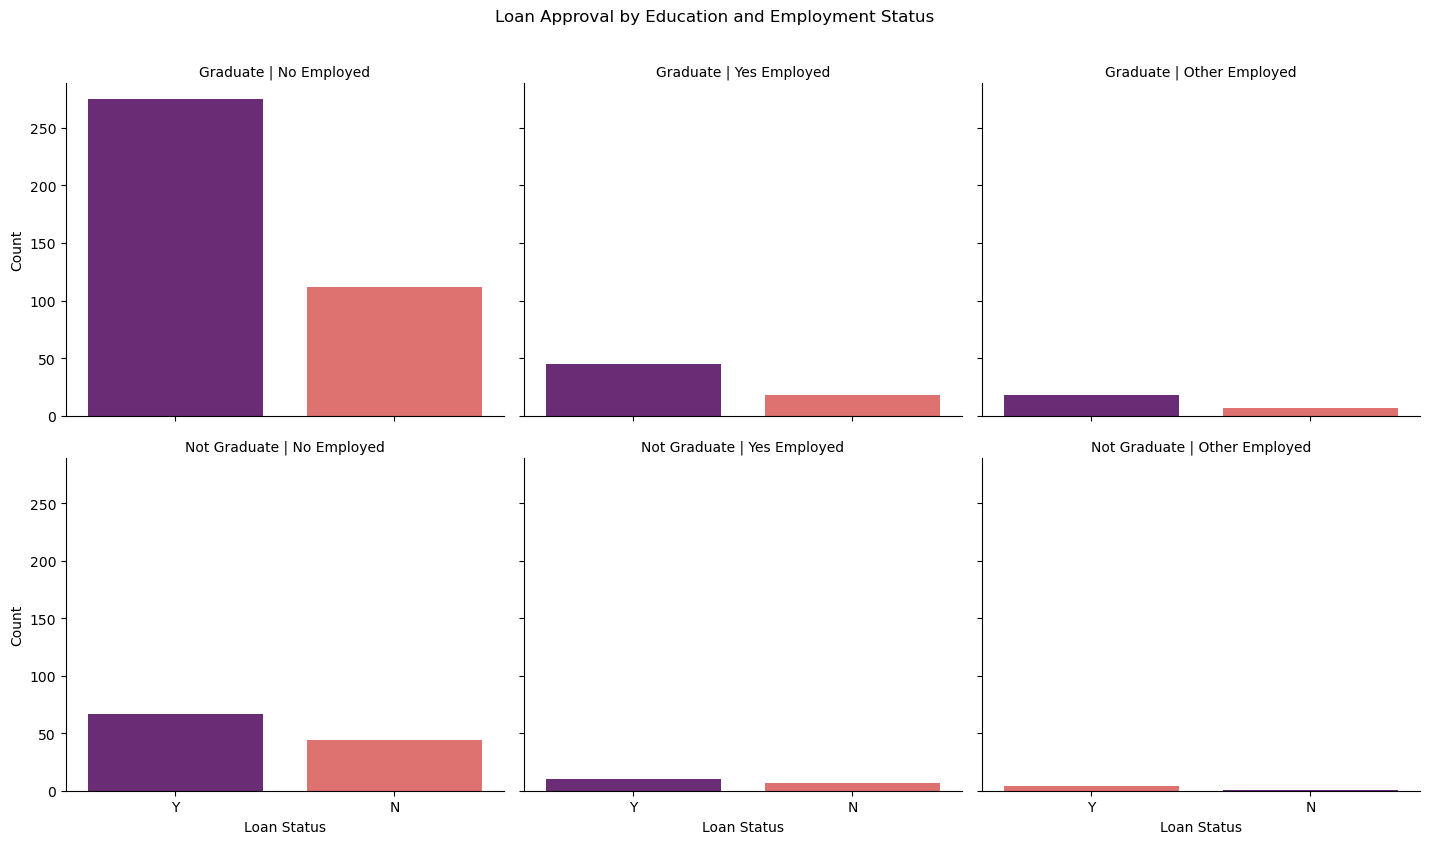

In [61]:
g = sns.FacetGrid(data, col='Self_Employed', row='Education', height=4, aspect=1.2)
g.map_dataframe(sns.countplot, x='Loan_Status', palette='magma')
g.set_axis_labels('Loan Status', 'Count')
g.set_titles(col_template="{col_name} Employed", row_template="{row_name}")
g.fig.suptitle('Loan Approval by Education and Employment Status', y=1.05)
plt.show()

**Gender × DTI × Loan_Status**

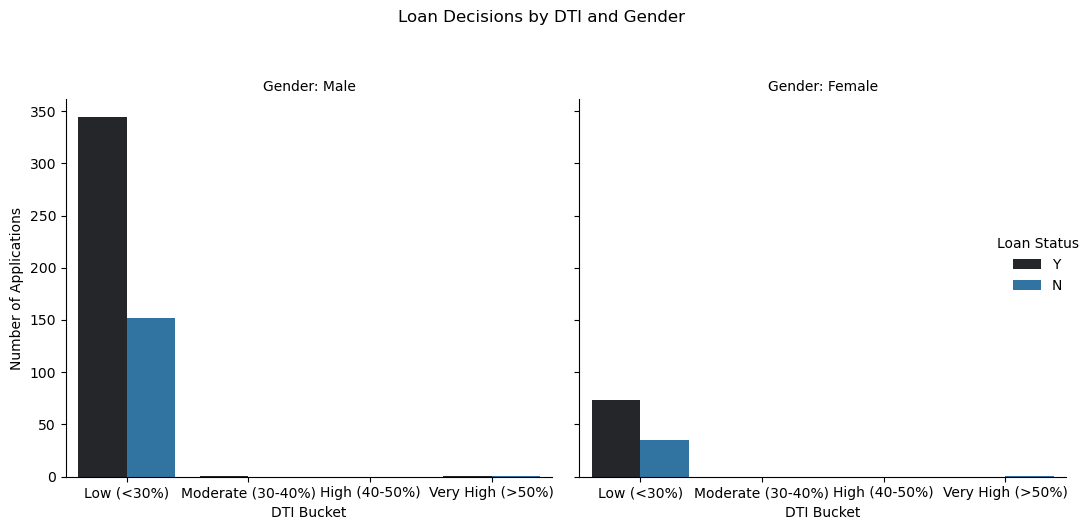

In [62]:
g = sns.FacetGrid(data, col='Gender', height=5, aspect=1)
g.map_dataframe(sns.countplot, x='DTI_Category', hue='Loan_Status', 
                order=['Low (<30%)','Moderate (30-40%)','High (40-50%)','Very High (>50%)'],
                hue_order=['Y','N'])
g.add_legend(title='Loan Status')
g.set_axis_labels('DTI Bucket', 'Number of Applications')
g.set_titles(col_template="Gender: {col_name}")
g.fig.suptitle('Loan Decisions by DTI and Gender', y=1.05)
plt.tight_layout()
plt.show()

**Gender × Employment × Loan_Status**

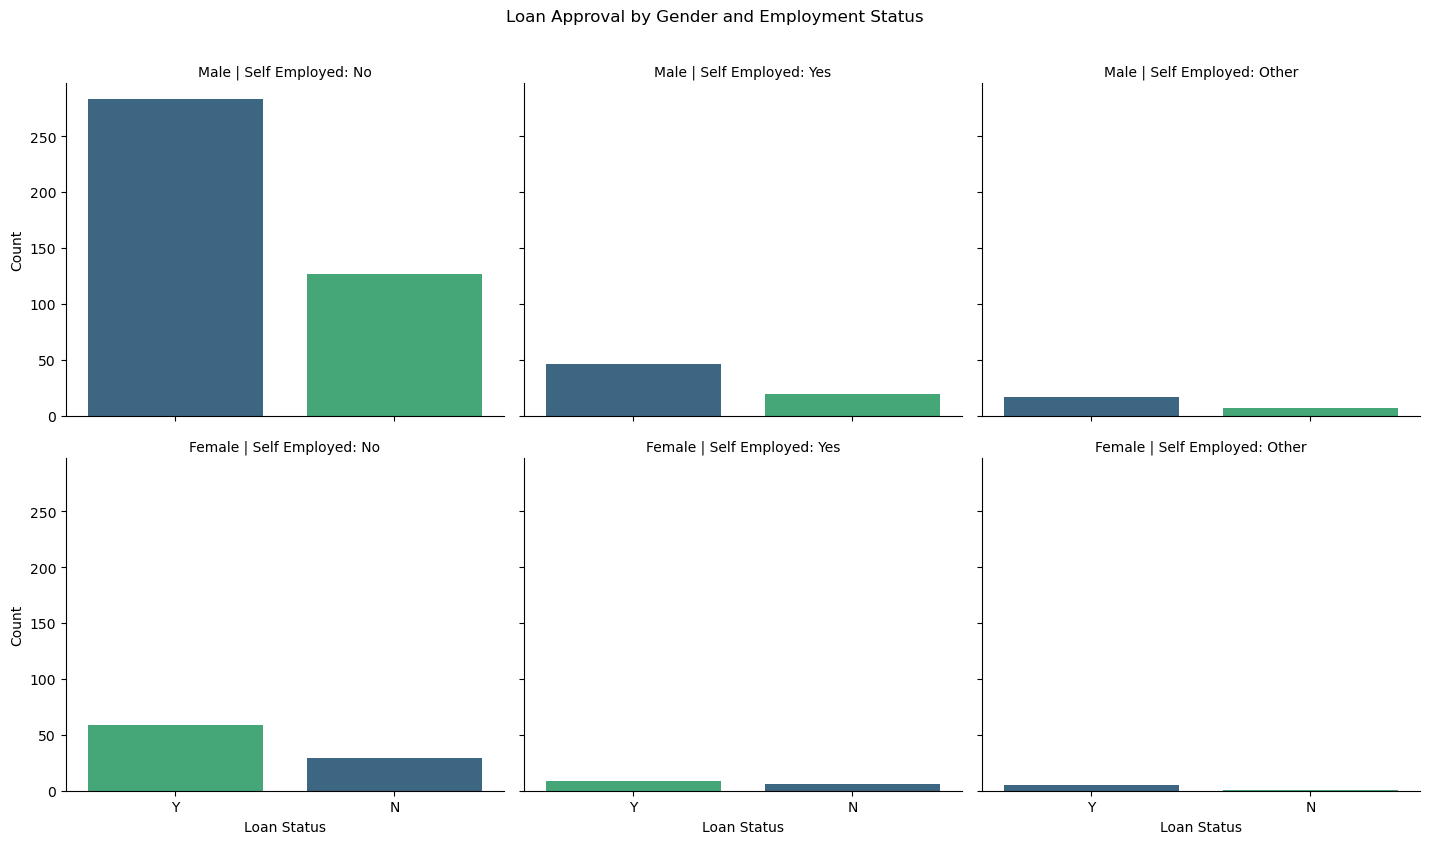

In [63]:
g = sns.FacetGrid(data, col='Self_Employed', row='Gender', height=4, aspect=1.2)
g.map_dataframe(sns.countplot, x='Loan_Status', palette='viridis')
g.set_axis_labels('Loan Status', 'Count')
g.set_titles(col_template="Self Employed: {col_name}", row_template="{row_name}")
g.fig.suptitle('Loan Approval by Gender and Employment Status', y=1.05)
plt.show()

**Gender × Education × Loan_Status**

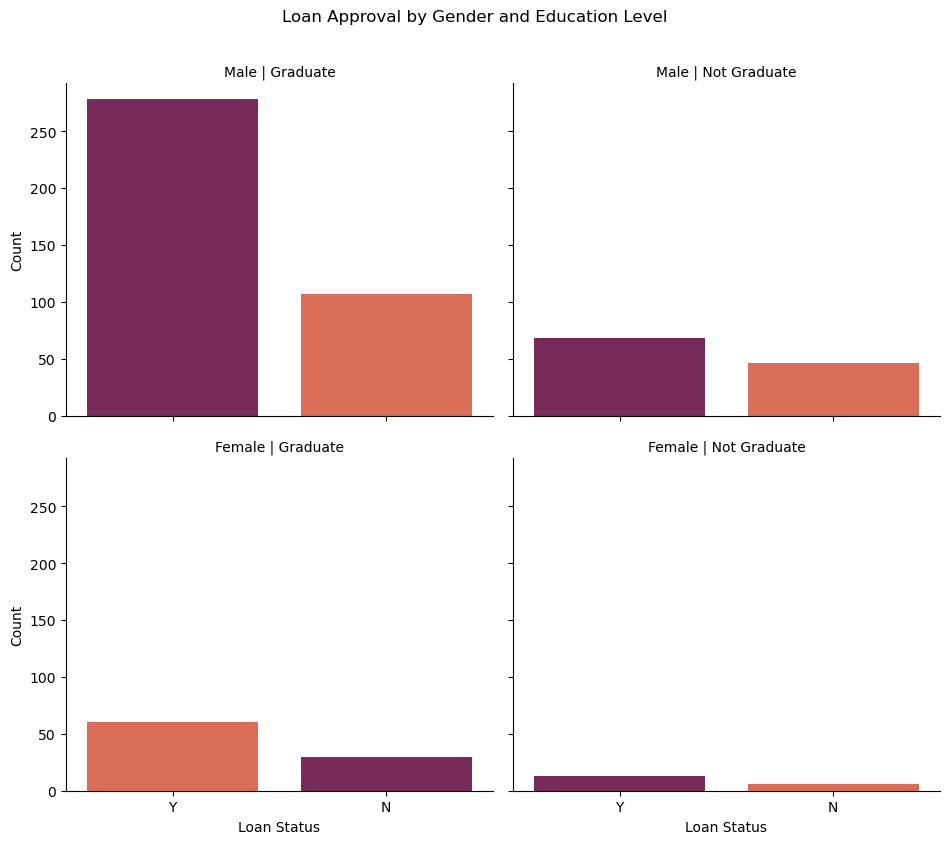

In [64]:
g = sns.FacetGrid(data, col='Education', row='Gender', height=4, aspect=1.2)
g.map_dataframe(sns.countplot, x='Loan_Status', palette='rocket')
g.set_axis_labels('Loan Status', 'Count')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.suptitle('Loan Approval by Gender and Education Level', y=1.05)
plt.show()

**Insights:**

- Applicants with good credit history have significantly higher approval rates.
- Low DTI (< 30%) applicants are mostly approved.
- Self-employed females show the most balanced approval/rejection ratio.
- The gender gap in approvals is more pronounced among salaried applicants.
- Graduates dominate the applicant pool regardless of employment status.
- Self-employed non-graduates have the lowest absolute approval numbers.
- Male graduates form the largest applicant segment.
- Female graduates have a higher approval-to-rejection ratio than male graduates.
- Non-graduate females are the smallest applicant group but with relatively high approval rates.

**Key findings:**

1. Loan Approval Patterns
    - Approval Rate: Majority of loans are approved (~70%), indicating relatively lenient criteria.

    - Credit History: Strongest predictor—applicants with good credit history (1) have significantly higher approval rates.
  
    - 40% DTI is the critical cutoff - there is a sudden drop in approval beyond this.
  
2. Demographic & Socioeconomic Factors
    - Gender:

        - Males apply more (~80% of applications), but females have slightly better approval rates when other factors are taken into account.

        - Self-employed females face the lowest approval rates (~50%).
     
    - Education:

        - Graduates have ~10-15% higher approval rates than non-graduates.

        - Non-graduate + self-employed applicants are the riskiest segment (~55% approval).

    - Employment Status:

        - Salaried applicants have higher approval rates than self-employed.

        - Self-employment negatively impacts approval more for women than men.
     
3. Property Location

   - Semiurban areas have the highest approval rates, possibly due to better collateral valuation.
  
    - Urban applicants apply most, but rural approvals are more selective.
     
4. Multivariate Interactions
    - Highest Approval: Salaried Male Graduates (~73%).

    - Lowest Approval: Self-Employed Female Non-Graduates (~48%).

    - Education Matters Most for self-employed applicants (20%+ approval gap vs. graduates).



**Business Recommendations:**

**1. Automate Initial Screening**

    - Implement automated credit score checks as the first screening step to quickly identify high-potential applicants.
    - Reject applications with DTI > 50% (unless strong collateral/guarantor).

**2. Priority preprocessing**

    - Fast-track DTI < 30% applications.

**3. Dynamic Pricing**

    - DTI < 30%: Offer lower interest rates.
    - DTI 30–40%: Require co-applicants or collateral.

**4. Self-Employed Solutions**

    - Flexible terms: Allow longer tenures (30 years) to reduce DTI.

**5. Women-Centric Products**

    - DTI discount: Reduce calculated DTI by 5% for single women (offset bias).

**6. Semiurban Focus**

    - Lower DTI thresholds: Approve up to 45% DTI (vs. 40% urban) due to lower default rates.

**7. Financial Education Programs**

    - Offer credit education for applicants with poor credit histories but otherwise strong profiles.
